In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/inetguru/IDS-CB35533/main/diabetes.csv')

train_data = data[:420]
test_data = data[421:442]

# Set predictors and target
# predictors = ['BMI']
# predictors = ['BP']
predictors = ['BMI', 'BP']
target = 'Y'
# Generate a model instance for linear regression
X_train = train_data[predictors]
y_train = train_data[target]
X_test = test_data[predictors]
y_test = test_data[target]

model = linear_model.LinearRegression()
# Perform Fit/Train, Check/print out the coefficients of your model
model.fit(X_train, y_train)
print(model.intercept_, model.coef_)
# Evaluate the model using the test data, Get r2 score.
# print(model.predict([[30.5]]))
print(model.predict([[30.5, 100.0]]))
print(metrics.r2_score(y_test, model.predict(X_test)))

# 4.
for predictor in data.columns:
  if (predictor not in predictors and predictor != target):
    predictors.append(predictor)
    X_train = train_data[predictors]
    y_train = train_data[target]
    X_test = test_data[predictors]
    y_test = test_data[target]
    model = linear_model.LinearRegression().fit(X_train, y_train)
    print(predictor, ":", metrics.r2_score(y_test, model.predict(X_test)))
    predictors.pop()

-202.8237181361084 [8.42629323 1.40835103]
[195.01332869]
0.4890345591616515
AGE : 0.4855490523808105
SEX : 0.4996251914830552
S1 : 0.4904422013213202
S2 : 0.4890347275690837
S3 : 0.47150563225915687
S4 : 0.49567295928553756
S5 : 0.5997841207001899
S6 : 0.44905656862056964



For the given dataset in the following code, perform a logistic regression.

Pregnancies : 0.6688311688311688
Glucose : 0.7597402597402597
[-5.51983416] [[0.03903946]]
BloodPressure : 0.6428571428571429
SkinThickness : 0.6428571428571429
Insulin : 0.6428571428571429
BMI : 0.6688311688311688
DiabetesPedigreeFunction : 0.6753246753246753
Age : 0.6493506493506493

[1]


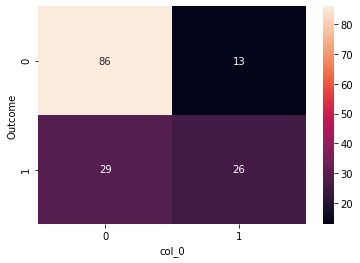

0.7272727272727273
BloodPressure : 0.7402597402597403
SkinThickness : 0.7467532467532467
BMI : 0.7597402597402597
DiabetesPedigreeFunction : 0.7467532467532467
Age : 0.7272727272727273


In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/inetguru/IDS-CB35533/main/pima_diabetes.csv')

train_data, test_data = train_test_split(data, train_size=0.8, random_state=1)

predictors = []
target = 'Outcome'
#1.
for pred in data.columns:
  if(pred != target):
    predictors.append(pred)
    X_train = train_data[predictors]
    y_train = train_data[target]
    X_test = test_data[predictors]
    y_test = test_data[target]
    model = linear_model.LogisticRegression().fit(X_train, y_train)
    print(pred, ":", metrics.accuracy_score(y_test, model.predict(X_test)))
    if(pred == 'Glucose'):
      print(model.intercept_, model.coef_)
    predictors.pop()
 
print()
#2.
predictors = ['Pregnancies', 'Glucose', 'Insulin']
X_train = train_data[predictors]
y_train = train_data[target]
X_test = test_data[predictors]
y_test = test_data[target]
model = linear_model.LogisticRegression().fit(X_train, y_train)
print(model.predict([[10, 150, 10]]))

cf_matrix = pd.crosstab(y_test, model.predict(X_test))
sn.heatmap(cf_matrix, annot=True)
plt.show()
print(metrics.accuracy_score(y_test, model.predict(X_test)))

print()
#3.
for predictor in data.columns:
  if (predictor not in predictors and predictor != target):
    predictors.append(predictor)
    X_train = train_data[predictors]
    y_train = train_data[target]
    X_test = test_data[predictors]
    y_test = test_data[target]
    model = linear_model.LogisticRegression().fit(X_train, y_train)
    print(predictor, ":", metrics.accuracy_score(y_test, model.predict(X_test)))
    predictors.pop()